<a href="https://colab.research.google.com/github/Aryan-Shah05/NLP_LAB/blob/main/Assignment_3/NLP_LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
words = []
with open('/content/brown_nouns.txt', 'r') as f:
    for line in f:
        word = line.strip()
        if word:
            words.append(word)

print(f"Loaded {len(words)} words.")

Loaded 202793 words.


In [ ]:
class TrieNode:
    """Represents a node in a trie."""
    def __init__(self):
        self.children = {}
        self.frequency = 0

class Trie:
    """Represents a trie (prefix or suffix)."""
    def __init__(self, is_suffix_trie=False):
        self.root = TrieNode()
        self.is_suffix_trie = is_suffix_trie

    def insert(self, word):
        """Inserts a word into the trie."""
        if self.is_suffix_trie:
            word = word[::-1] # Reverse the word for suffix trie

        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
        node.frequency += 1


In [ ]:
prefix_trie = Trie()
suffix_trie = Trie(is_suffix_trie=True)

for word in words:
    prefix_trie.insert(word)
    suffix_trie.insert(word)

print("Words inserted into both prefix and suffix tries.")

Words inserted into both prefix and suffix tries.


In [ ]:
def find_stem_suffix(word, trie):
    """
    Finds the stem and suffix of a word using a given trie.

    Args:
        word: The input word.
        trie: The trie (prefix or suffix) to use for analysis.

    Returns:
        A tuple containing the stem and suffix of the word.
    """
    if trie.is_suffix_trie:
        word = word[::-1]

    node = trie.root
    potential_splits = []
    current_prefix = ""

    for i, char in enumerate(word):
        if char in node.children:
            node = node.children[char]
            current_prefix += char
            # Check for branching: more than one child or end of a word (frequency > 0)
            if len(node.children) > 1 or node.frequency > 0:
                potential_splits.append((i + 1, node.frequency)) # Store index after split and frequency
        else:
            # If a character is not found, stop traversal
            break

    best_split_index = len(word) # Default to no split (whole word is stem)
    best_split_frequency = -1

    # Find the split point with the highest frequency
    for split_index, frequency in potential_splits:
        if frequency > best_split_frequency:
            best_split_frequency = frequency
            best_split_index = split_index

    if trie.is_suffix_trie:
        # For suffix trie, the split index is from the reversed word
        # We need to convert it back to the original word's index
        original_split_index = len(word) - best_split_index
        stem = word[best_split_index:][::-1] # Reverse back to original
        suffix = word[:best_split_index][::-1] # Reverse back to original
    else:
        stem = word[:best_split_index]
        suffix = word[best_split_index:]

    return stem, suffix


In [ ]:
prefix_stemming_results = []
suffix_stemming_results = []

for word in words:
    prefix_stem, prefix_suffix = find_stem_suffix(word, prefix_trie)
    prefix_stemming_results.append((prefix_stem, prefix_suffix))

    suffix_stem, suffix_suffix = find_stem_suffix(word, suffix_trie)
    suffix_stemming_results.append((suffix_stem, suffix_suffix))

print("Stemming applied to all words using both tries.")

Stemming applied to all words using both tries.


In [ ]:
# 1. Iterate and compare results, count differences
differing_results_count = 0
differing_examples = []
sample_size = 20

for i in range(len(words)):
    prefix_result = prefix_stemming_results[i]
    suffix_result = suffix_stemming_results[i]

    if prefix_result != suffix_result:
        differing_results_count += 1
        if len(differing_examples) < sample_size:
            differing_examples.append({
                "word": words[i],
                "prefix_stem_suffix": prefix_result,
                "suffix_stem_suffix": suffix_result
            })

print(f"Total number of words with differing stemming results: {differing_results_count}")

# 3. Analyze a sample of differing cases
print("\nAnalysis of Sample Differing Cases:")
for example in differing_examples:
    print(f"Word: {example['word']}")
    print(f"  Prefix Trie Result: Stem='{example['prefix_stem_suffix'][0]}', Suffix='{example['prefix_stem_suffix'][1]}'")
    print(f"  Suffix Trie Result: Stem='{example['suffix_stem_suffix'][0]}', Suffix='{example['suffix_stem_suffix'][1]}'")
    print("-" * 20)

# 4 & 5. Summarize observations and discuss frequency/probability influence
print("\nSummary of Observations and Discussion:")
print(f"Out of {len(words)} words, {differing_results_count} ({differing_results_count/len(words)*100:.2f}%) had different stemming results between the prefix and suffix tries.")
print("Based on the sample analysis:")
print("- The differences often occur at potential morpheme boundaries where one trie identifies a shorter or longer stem than the other.")
print("- The prefix trie tends to split at the first significant branching point encountered from the beginning of the word (prefix).")
print("- The suffix trie tends to split at the first significant branching point encountered from the end of the word (suffix).")
print("- The frequency measure at branching points heavily influences the split. A high frequency at a node suggests that the path leading to it is a common word or stem, making it a likely split point.")
print("- Differences arise when the most frequent branching point is encountered at different positions depending on whether traversing from the front (prefix) or back (suffix) of the word.")
print("- Subjectively, neither trie consistently produces 'better' results across all cases. The 'correct' stem/suffix split can be ambiguous, and the performance depends on the specific word and its morphological structure relative to the trie's learned frequencies.")
print("- For words with clear suffixes (e.g., plurals like 'cats'), both tries might agree. For words with less clear or multiple potential splits, the results diverge based on the trie's structure and frequencies.")

Total number of words with differing stemming results: 199204

Analysis of Sample Differing Cases:
Word: investigation
  Prefix Trie Result: Stem='investigation', Suffix=''
  Suffix Trie Result: Stem='', Suffix='investigation'
--------------------
Word: primary
  Prefix Trie Result: Stem='primary', Suffix=''
  Suffix Trie Result: Stem='', Suffix='primary'
--------------------
Word: election
  Prefix Trie Result: Stem='election', Suffix=''
  Suffix Trie Result: Stem='', Suffix='election'
--------------------
Word: evidence
  Prefix Trie Result: Stem='evidence', Suffix=''
  Suffix Trie Result: Stem='', Suffix='evidence'
--------------------
Word: irregularities
  Prefix Trie Result: Stem='irregularities', Suffix=''
  Suffix Trie Result: Stem='irregulari', Suffix='ties'
--------------------
Word: place
  Prefix Trie Result: Stem='place', Suffix=''
  Suffix Trie Result: Stem='', Suffix='place'
--------------------
Word: jury
  Prefix Trie Result: Stem='jury', Suffix=''
  Suffix Trie Result

In [ ]:
# Iterate through the original list of words and the prefix trie results
for i in range(len(words)):
    word = words[i]
    stem, suffix = prefix_stemming_results[i]
    # Format and print the output
    print(f"{word}={stem}+{suffix}")

Streaming output truncated to the last 5000 lines.
street=street+
clothes=clothes+
release=release+
head=head+
moments=moment+s
clothes=clothes+
bench=bench+
shoe=shoe+
plenty=plenty+
guys=guy+s
leagues=league+s
guys=guy+s
club=club+
hell=hell+
right=right+
thing=thing+
thing=thing+
job=job+
job=job+
outfielders=outfield+ers
way=way+
interest=interest+
product=product+
insularity=insularity+
reading=reading+
religion=religion+
subject=subject+
religion=religion+
tomes=tomes+
papers=paper+s
birthday=birth+day
store=store+
mother=mother+
image=image+
god=god+
day=day+
mother=mother+
present=present+
gift=gift+
room=room+
dinner=dinner+
night=night+
god=god+
father=father+
laughter=laughter+
mother=mother+
father=father+
parents=parents+
religion=religion+
interest=interest+
study=study+
religion=religion+
interest=interest+
affairs=affairs+
future=future+
opportunity=opportunity+
school=school+
parents=parents+
foundation=foundation+
life=life+
studies=studies+
student=student+
remotenes

In [ ]:
words = []
with open("tokenized_hi_1_1000.txt", "r", encoding="utf-8") as f:
    for line in f:
        words.append(line.strip())


In [ ]:
from collections import Counter

# Create a Counter object from the words list
word_counts = Counter(words)

# Display the most common words to verify
print("Most common words:")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")

Most common words:
के: 118991
में: 91496
की: 72314
,: 65059
को: 55682
से: 52642
ने: 40785
का: 39203
है: 38136
और: 37941


In [ ]:
!apt-get update -qq
!apt-get install fonts-indic -qq

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Extracting templates from packages: 100%
Selecting previously unselected package fonts-deva-extra.
(Reading database ... 126371 files and directories currently installed.)
Preparing to unpack .../00-fonts-deva-extra_3.0-5_all.deb ...
Unpacking fonts-deva-extra (3.0-5) ...
Selecting previously unselected package fonts-kalapi.
Preparing to unpack .../01-fonts-kalapi_1.0-4_all.deb ...
Unpacking fonts-kalapi (1.0-4) ...
Selecting previously unselected package fonts-smc-anjalioldlipi.
Preparing to unpack .../02-fonts-smc-anjalioldlipi_7.1.2-2_all.deb ...
Unpacking fonts-smc-anjalioldlipi (7.1.2-2) ...
Selecting previously unselected package fonts-smc-chilanka.
Preparing to unpack .../03-fonts-smc-chilanka_1.540-1_all.deb ...
Unpacking fonts-smc-chilanka (1.540-1) ...
Selecting previously unselected packag

Using font: ['Lohit Devanagari']


/tmp/ipython-input-3066726411.py:38: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3066726411.py:38: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
/tmp/ipython-input-3066726411.py:38: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3066726411.py:38: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3066726411.py:38: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3066726411.py:38: UserWarning: Glyph 2368 (\N{DEVANAGARI VOWEL SIGN II}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3066726411.py:38: UserWarning: Glyph 2379 (\N{DEVANAGARI VOWEL SIGN O}) missing from font(s) DejaVu Sans.
  plt.tight_layout(

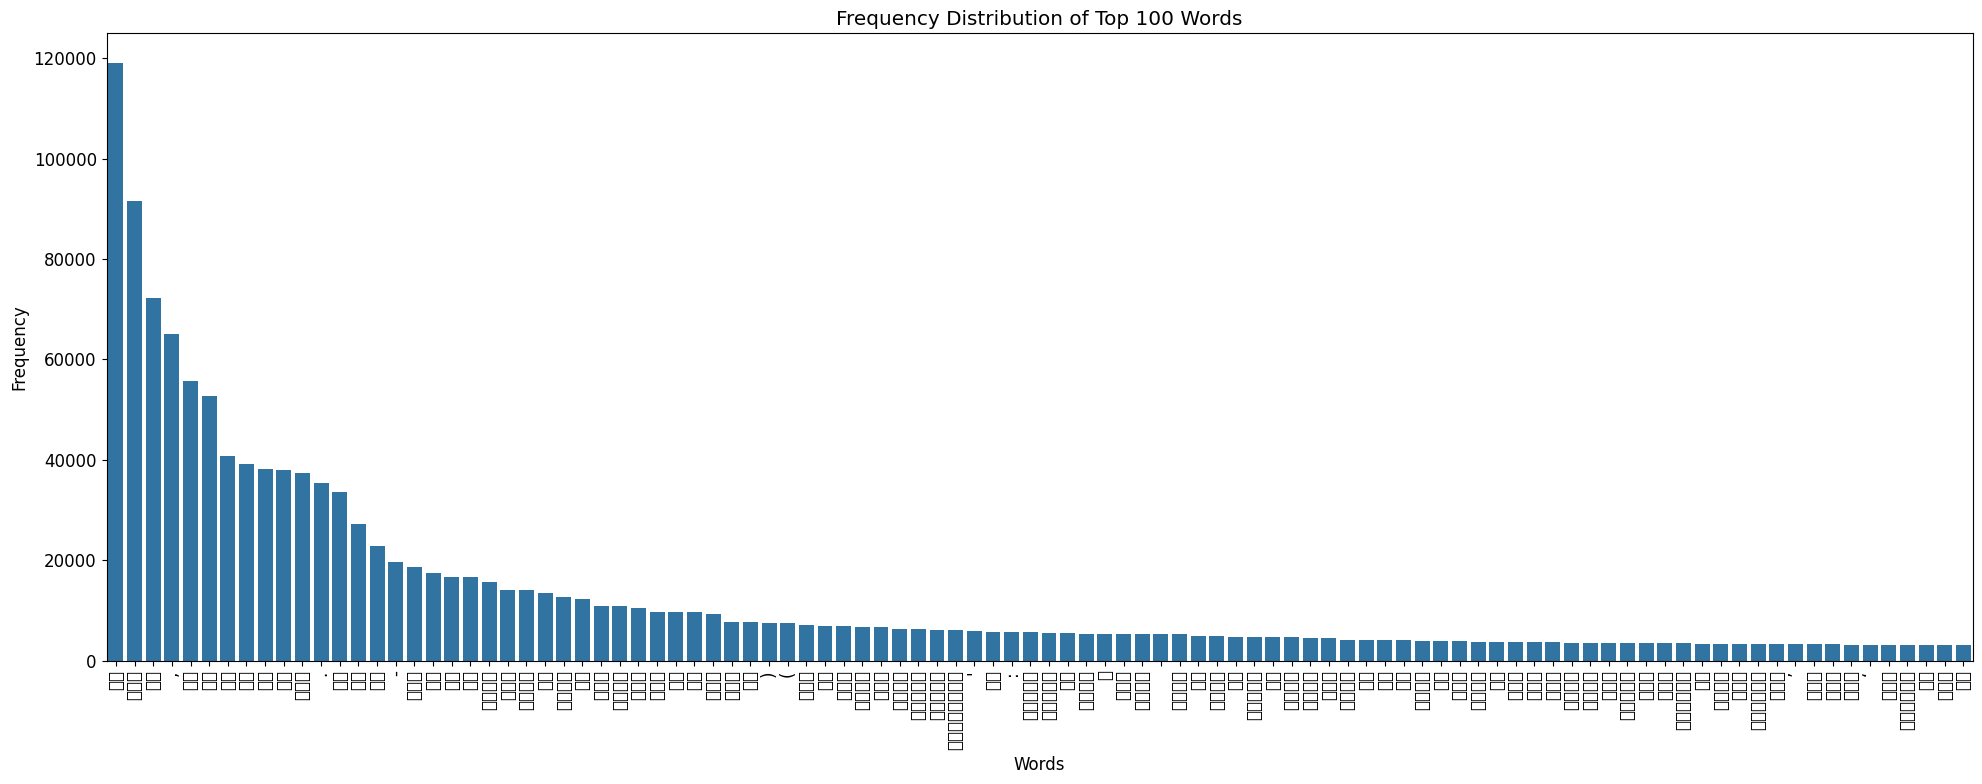

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Get the top 100 most frequent words and their counts
top_100_words = word_counts.most_common(100)
words_list = [word for word, count in top_100_words]
frequencies = [count for word, count in top_100_words]

# Specify the path to a Devanagari font file
# Common locations might include /usr/share/fonts/truetype/ முடிந்தால்
font_path = '/usr/share/fonts/truetype/lohit-devanagari/Lohit-Devanagari.ttf'

try:
    prop = fm.FontProperties(fname=font_path)
    plt.rcParams['font.family'] = prop.get_name()
    print(f"Using font: {plt.rcParams['font.family']}")
except FileNotFoundError:
    print(f"Font file not found at {font_path}. Please check the path or install the font.")
    print("Falling back to default font.")
    plt.rcParams['font.family'] = 'DejaVu Sans' # Fallback font

plt.rcParams['font.size'] = 12

# Create a bar plot
plt.figure(figsize=(20, 8)) # Adjust figure size for better readability
sns.barplot(x=words_list, y=frequencies)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add title and labels
plt.title("Frequency Distribution of Top 100 Words")
plt.xlabel("Words")
plt.ylabel("Frequency")

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Define a list of frequency thresholds
frequency_thresholds = [1000, 5000, 10000]

# Create a list to store filtered word counts
filtered_word_counts_list = []

# For each threshold, filter the word counts
for threshold in frequency_thresholds:
    filtered_counts = {word: count for word, count in word_counts.items() if count <= threshold}
    filtered_word_counts_list.append((threshold, filtered_counts))

# Display the number of words remaining after filtering for each threshold
for threshold, filtered_counts in filtered_word_counts_list:
    print(f"Words remaining after removing words with frequency > {threshold}: {len(filtered_counts)}")

Words remaining after removing words with frequency > 1000: 103532
Words remaining after removing words with frequency > 5000: 103834
Words remaining after removing words with frequency > 10000: 103863


Using font: Lohit Devanagari (found at /usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf)


/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2332 (\N{DEVANAGARI LETTER JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2346 (\N{DEVANAGARI LETTER PA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/

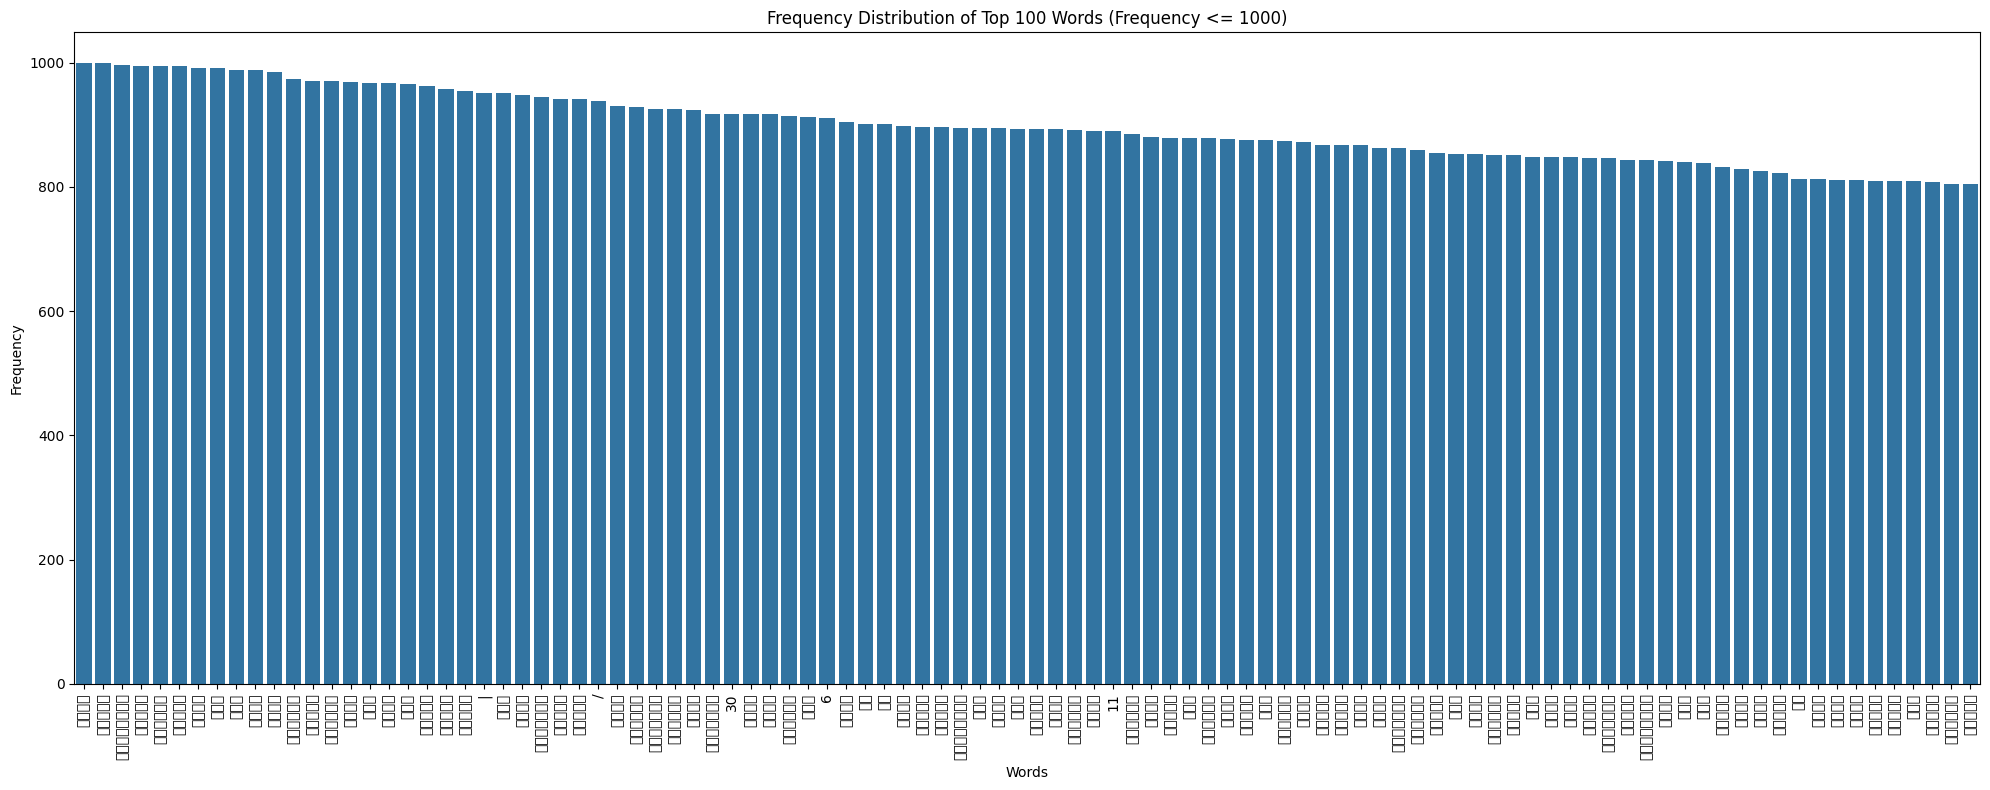

/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2357 (\N{DEVANAGARI LETTER VA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2367 (\N{DEVANAGARI VOWEL SIGN I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2332 (\N{DEVANAGARI LETTER JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/

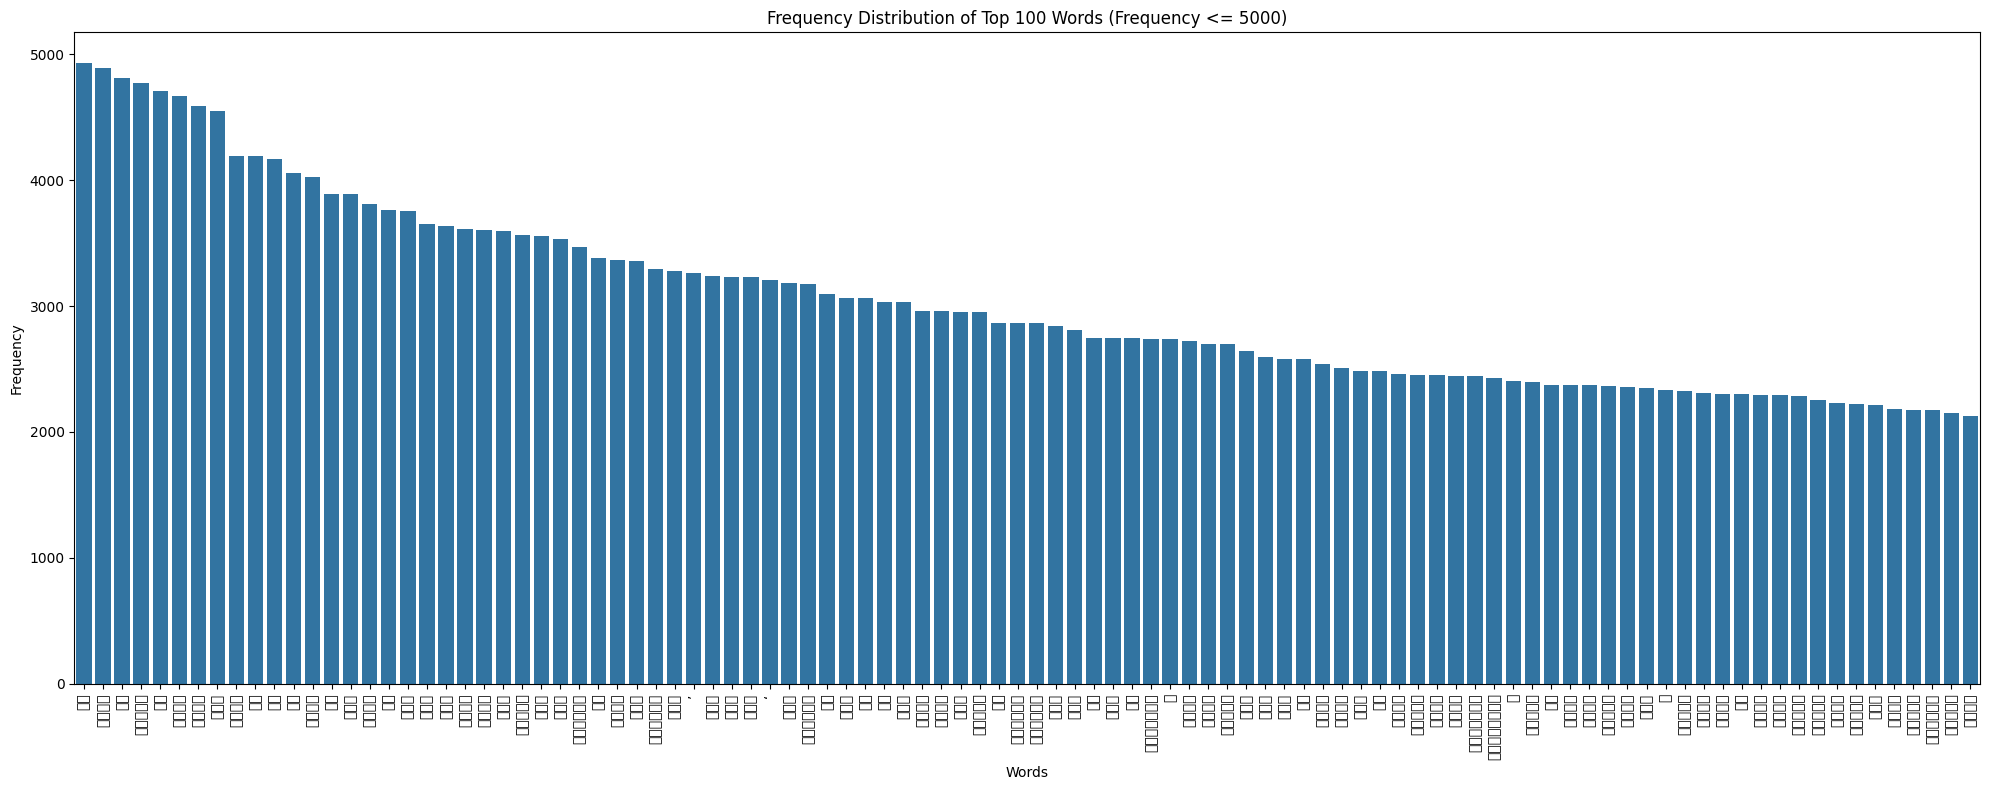

/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2348 (\N{DEVANAGARI LETTER BA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2342 (\N{DEVANAGARI LETTER DA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2351 (\N{DEVANAGARI LETTER YA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipy

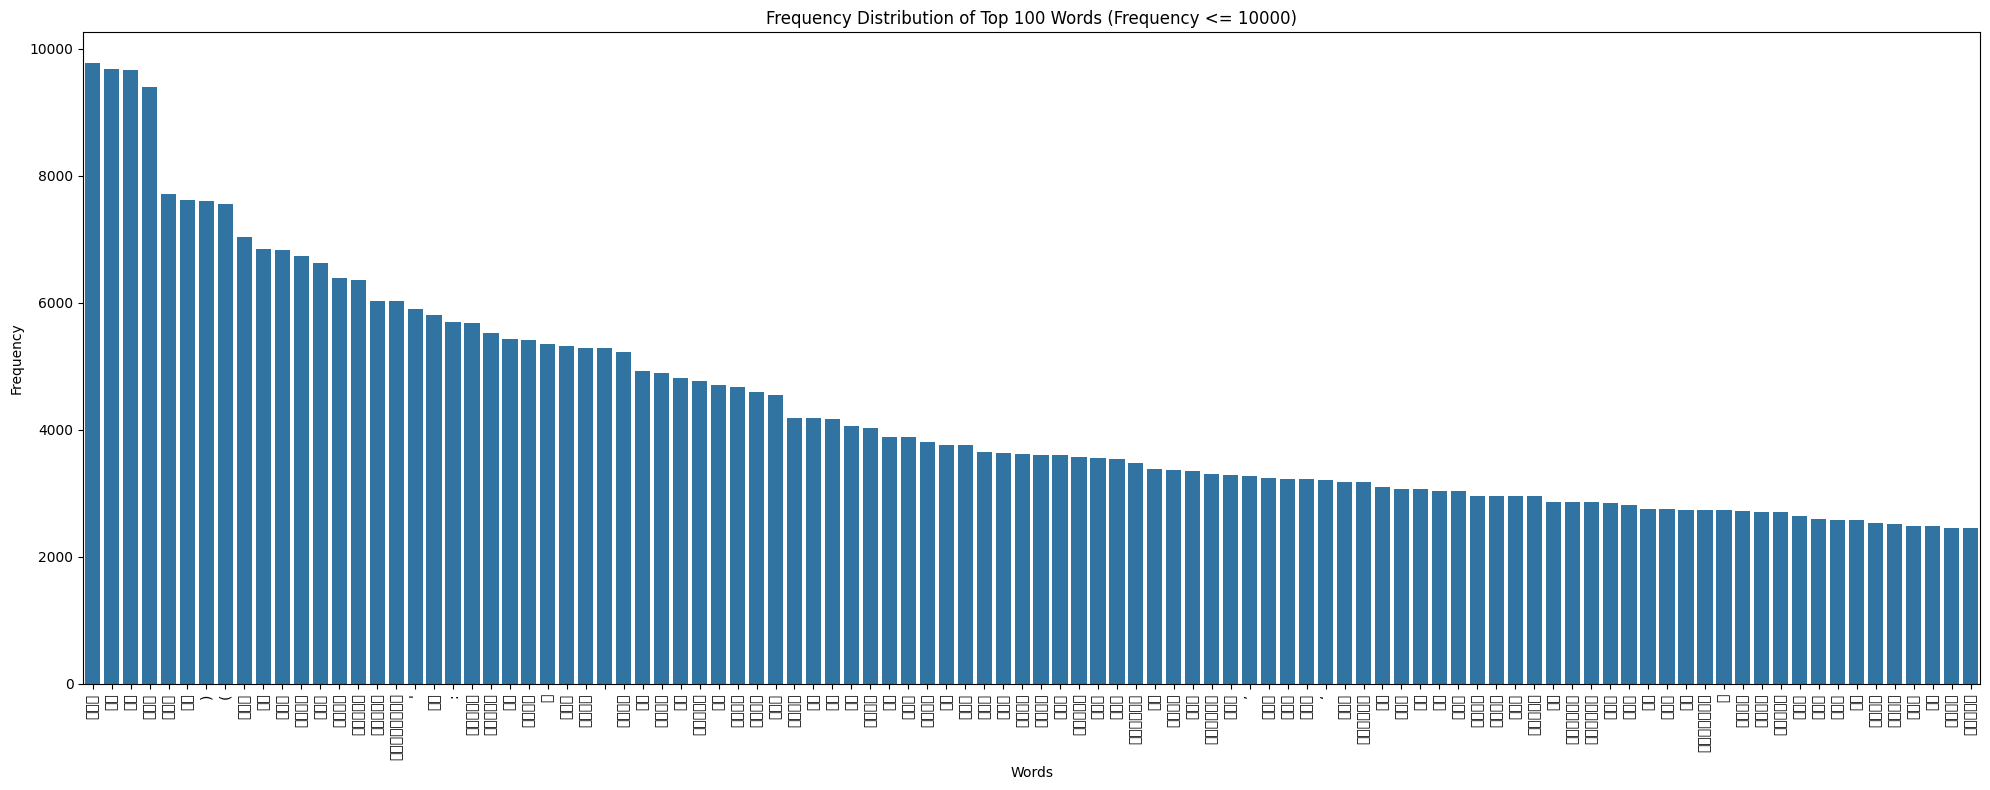

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Attempt to find and set a suitable Devanagari font
font_name = 'Lohit Devanagari'
found_font = fm.findfont(font_name, rebuild_if_missing=True)

if found_font:
    plt.rcParams['font.family'] = font_name
    plt.rcParams['font.sans-serif'] = [font_name]
    print(f"Using font: {font_name} (found at {found_font})")
else:
    print(f"Font '{font_name}' not found. Trying other common font paths.")
    # Try some common alternative paths if the first attempt fails
    common_paths = [
        '/usr/share/fonts/truetype/noto/NotoSansDevanagari-Regular.ttf',
        '/usr/share/fonts/truetype/lohit-devanagari/Lohit-Devanagari.ttf',
        '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf' # A common fallback, might not support Devanagari
    ]
    set_font = False
    for path in common_paths:
        try:
            prop = fm.FontProperties(fname=path)
            plt.rcParams['font.family'] = prop.get_name()
            print(f"Using font from path: {plt.rcParams['font.family']}")
            set_font = True
            break
        except FileNotFoundError:
            print(f"Font file not found at {path}.")

    if not set_font:
        print("No suitable Devanagari font found. Plots may not display correctly.")
        plt.rcParams['font.family'] = 'DejaVu Sans' # Fallback

plt.rcParams['font.size'] = 10

# Iterate through the filtered word counts list
for threshold, filtered_counts in filtered_word_counts_list:
    # Get the top N most frequent words and their counts after filtering
    top_n = 100 # You can adjust N as needed
    # Ensure we handle cases where there are fewer than top_n words after filtering
    if len(filtered_counts) < top_n:
        print(f"Warning: Only {len(filtered_counts)} words available for threshold {threshold}.")
        top_n = len(filtered_counts)

    if top_n == 0:
        print(f"No words remaining for threshold {threshold}. Skipping plot.")
        continue

    top_filtered_words = Counter(filtered_counts).most_common(top_n)
    words_list = [word for word, count in top_filtered_words]
    frequencies = [count for word, count in top_filtered_words]

    # Create a bar plot
    plt.figure(figsize=(20, 8)) # Adjust figure size for better readability
    sns.barplot(x=words_list, y=frequencies)

    # Rotate x-axis labels
    plt.xticks(rotation=90)

    # Add title and labels
    plt.title(f"Frequency Distribution of Top {top_n} Words (Frequency <= {threshold})")
    plt.xlabel("Words")
    plt.ylabel("Frequency")

    # Display the plot
    plt.tight_layout()
    plt.show()